## Taurus test

In [3]:
import aplpy
from astropy.io import fits
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Planck

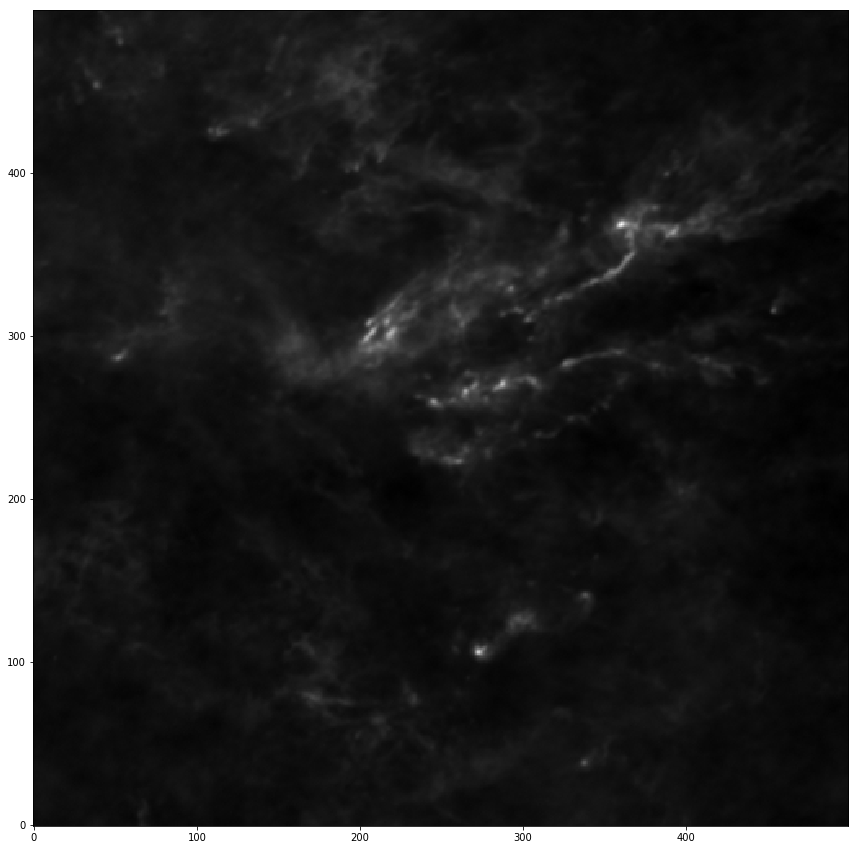

In [9]:
#Read map
figfile = '/Users/robitaij/postdoc/Joncour/test_Taurus_Planck_v3.fits'
HDU = fits.open(figfile)
im = HDU[0].data
header = HDU[0].header

figure(figsize=(15,15))
imshow(im,origin='below',cmap='gray')

In [10]:
from bokeh.plotting import figure as figbok
from bokeh.io import output_notebook
from bokeh.io import show as showbok
output_notebook()

from astropy import wcs
from powspec import powspec
from wavan import fan_trans, apodize, padding, depad
from rebin import congrid
from gauss_beam import gauss_beam

Loading BokehJS ...

In [21]:
na = im.shape[1]
nb = im.shape[0]
imzm = im - np.mean(im)

#Apodization

tapper = apodize(nb,na,0.98)
imt = imzm *tapper
imr = padding(imt,800,800)

#Fourier power spectrum
tab_k, spec_k = powspec(imr, reso=1)

#Plot Fourier power spectrum
Tools='pan,box_zoom,reset,save,hover'
f = figbok( x_axis_label="k [pixels^-1]", x_axis_type="log", \
           y_axis_label="P[k]", y_axis_type="log", tools=Tools)
f.line(tab_k, spec_k, legend='Fourier')

#Set a list of q
q=[]
#q[0:4]=[1.4]*5
#q[5:25]=[2.5]*20
q=[2.1]*25
print q

#Wavelet power spectrum
#wt, S11a, wav_k, S1a, q = fan_trans(imzm, reso=1, q=q, qdyn=False, apodize= 0.98, arrdim = np.array([800,800]))

f.diamond(wav_k, S1a[0,:], legend='Wavelet',color='black',line_width=5)
f.triangle(wav_k, S1a[1,:], legend='Coherent',color='blue',line_width=5)
f.square(wav_k, S1a[2,:], legend='Gaussian',color='red',line_width=5)

#Power law fit
coef = np.polyfit(np.log(wav_k[8:15]),np.log(S1a[2,8:15]),deg=1)
yfit = np.exp(coef[1])*wav_k**coef[0]

coef2 = np.polyfit(np.log(wav_k[8:15]),np.log(S1a[1,8:15]),deg=1)
yfit2 = np.exp(coef2[1])*wav_k**coef2[0]

print "Power law = ", coef[0],coef2[0]

f.line(wav_k, yfit, legend='Fit', line_dash='dashed')
f.line(wav_k, yfit2, line_dash='dashed')

showbok(f)

[2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1]
Power law =  -3.0093058307292373 -2.367531131292663


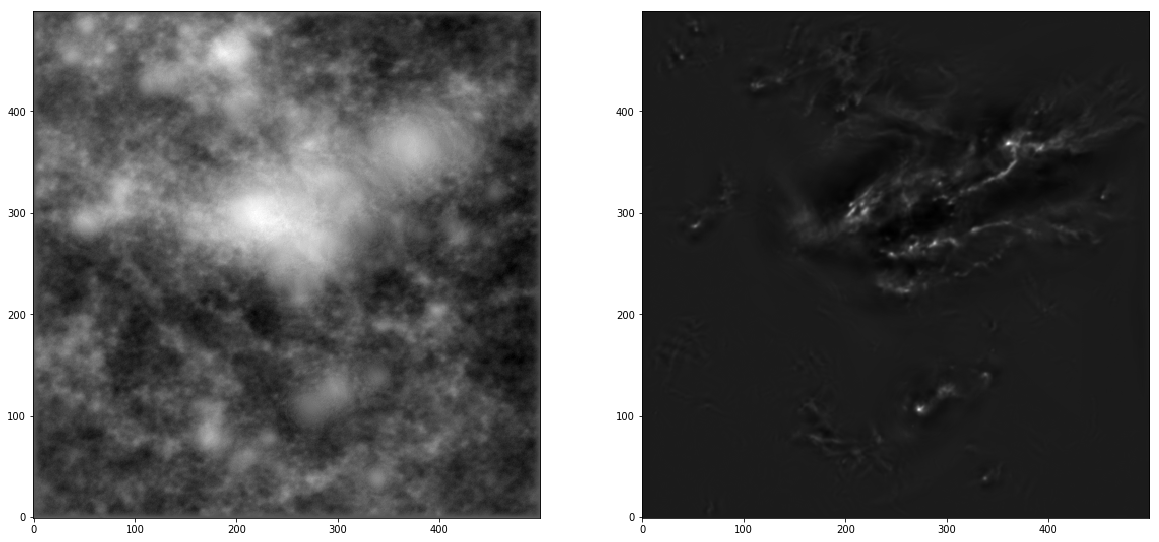

In [20]:
M = wav_k.shape[0]

coherent = np.sum(wt[M:2*M,:,:],axis=0)#+np.sum(wt[2*M:2*M+6,:,:],axis=0)
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0)#-np.sum(wt[2*M:2*M+6,:,:],axis=0)

fits.writeto('/Users/robitaij/postdoc/Joncour/Taurus_cohe.fits',\
            coherent.real,header,overwrite=True)
fits.writeto('/Users/robitaij/postdoc/Joncour/Taurus_gaussian.fits',\
            Gaussian.real,header,overwrite=True)
fits.writeto('/Users/robitaij/postdoc/Joncour/Taurus_wt.fits',\
            wt.real,header,overwrite=True)

figure(figsize=(20,10))

plt.subplot(1,2,1)
imshow(Gaussian.real,origin='below',cmap='gray')
plt.subplot(1,2,2)
imshow(coherent.real,origin='below',cmap='gray')

## Star density

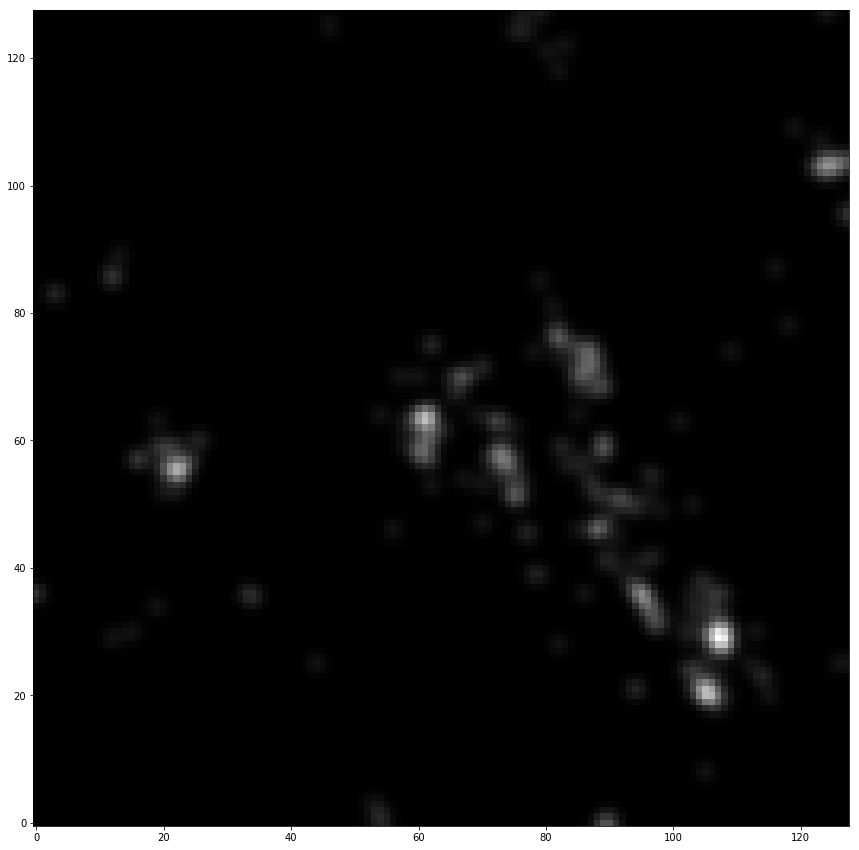

In [23]:
#Read map
figfile = '/Users/robitaij/postdoc/Joncour/TauG_ppp_dens0.15.fits'
HDU = fits.open(figfile)
im = HDU[0].data
header = HDU[0].header

figure(figsize=(15,15))
imshow(im,origin='below',cmap='gray')

In [31]:
na = im.shape[1]
nb = im.shape[0]
imzm = im - np.mean(im)

#Apodization

tapper = apodize(nb,na,0.98)
imt = imzm *tapper
imr = padding(imt,200,200)

#Fourier power spectrum
tab_k, spec_k = powspec(imr, reso=1)

#Plot Fourier power spectrum
Tools='pan,box_zoom,reset,save,hover'
f = figbok( x_axis_label="k [pixels^-1]", x_axis_type="log", \
           y_axis_label="P[k]", y_axis_type="log", tools=Tools)
f.line(tab_k, spec_k, legend='Fourier')

#Set a list of q
q=[]
#q[0:4]=[1.4]*5
#q[5:25]=[2.5]*20
q=[1.8]*25
print q

#Wavelet power spectrum
wt, S11a, wav_k, S1a, q = fan_trans(imzm, reso=1, q=q, qdyn=False, apodize= 0.98, arrdim = np.array([200,200]))

f.diamond(wav_k, S1a[0,:], legend='Wavelet',color='black',line_width=5)
f.triangle(wav_k, S1a[1,:], legend='Coherent',color='blue',line_width=5)
f.square(wav_k, S1a[2,:], legend='Gaussian',color='red',line_width=5)

#Power law fit
coef = np.polyfit(np.log(wav_k[8:15]),np.log(S1a[2,8:15]),deg=1)
yfit = np.exp(coef[1])*wav_k**coef[0]

coef2 = np.polyfit(np.log(wav_k[8:15]),np.log(S1a[1,8:15]),deg=1)
yfit2 = np.exp(coef2[1])*wav_k**coef2[0]

print "Power law = ", coef[0],coef2[0]

f.line(wav_k, yfit, legend='Fit', line_dash='dashed')
f.line(wav_k, yfit2, line_dash='dashed')

showbok(f)

[1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8]
200 200
Power law =  -19.47598261923986 -2.8432663816582897


[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.0999999999999996, 2.1999999999999997, 1.9999999999999996, 1.9999999999999996, 2.1999999999999997, 2.1999999999999997, 2.0999999999999996, 1.6999999999999993, 1.5999999999999992, 1.7999999999999994, 1.7999999999999994, 1.8999999999999995, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]
wav_k.shape[0]= 18


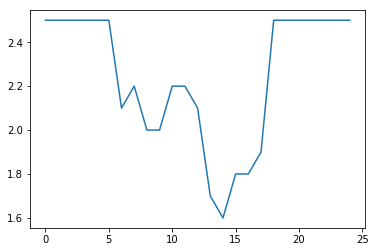

In [29]:
print q
print 'wav_k.shape[0]=',wav_k.shape[0]

x = range(25)
plot(x,np.array(q).reshape(25))

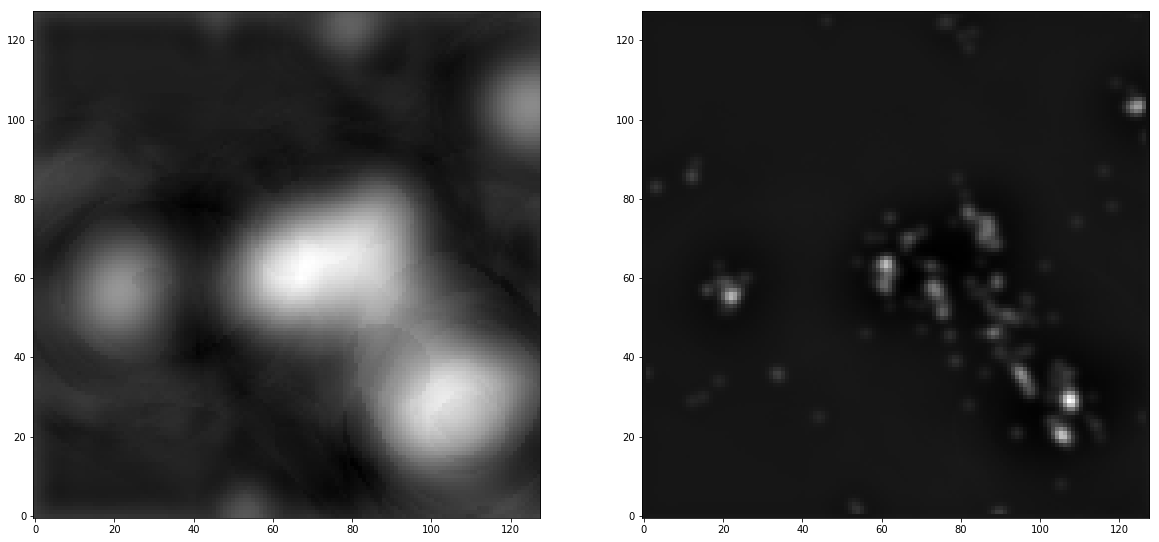

In [32]:
M = wav_k.shape[0]

coherent = np.sum(wt[M:2*M,:,:],axis=0)#+np.sum(wt[2*M:2*M+6,:,:],axis=0)
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0)#-np.sum(wt[2*M:2*M+6,:,:],axis=0)

fits.writeto('/Users/robitaij/postdoc/Joncour/density_cohe.fits',\
            coherent.real,header,overwrite=True)
fits.writeto('/Users/robitaij/postdoc/Joncour/density_gaussian.fits',\
            Gaussian.real,header,overwrite=True)
fits.writeto('/Users/robitaij/postdoc/Joncour/density_wt.fits',\
            wt.real,header,overwrite=True)

figure(figsize=(20,10))

plt.subplot(1,2,1)
imshow(Gaussian.real,origin='below',cmap='gray')
plt.subplot(1,2,2)
imshow(coherent.real,origin='below',cmap='gray')